# Visualization of distributional shapes using the [beta-distribution](https://en.wikipedia.org/wiki/Beta_distribution)

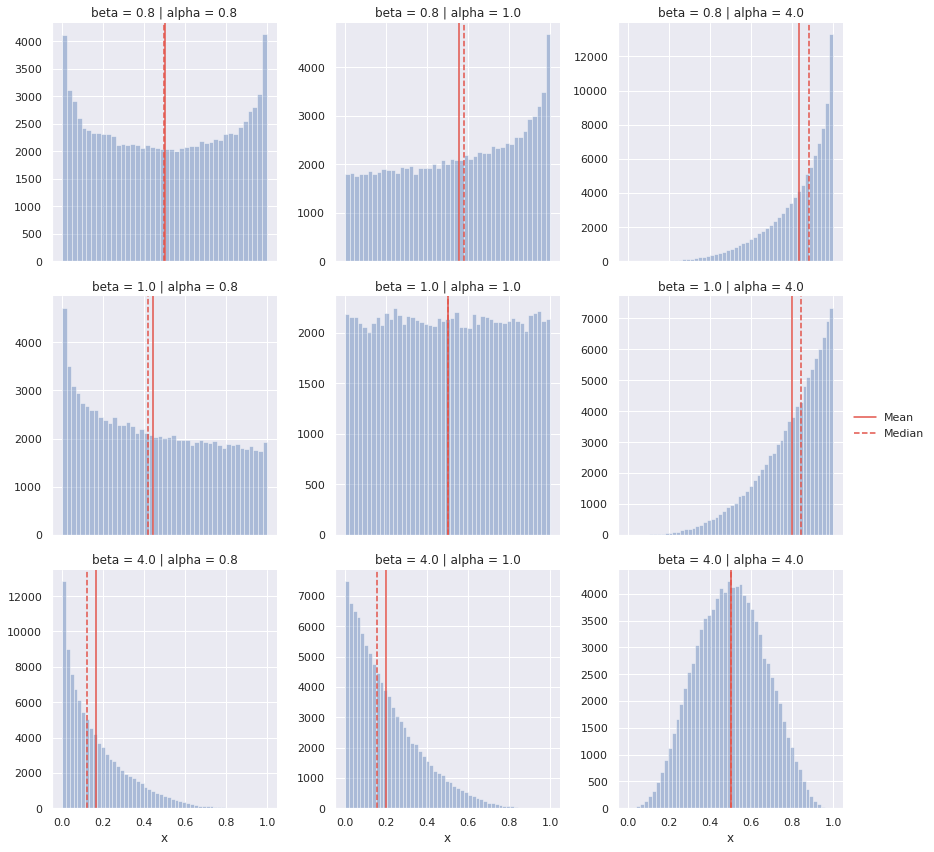

In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
sns.set()

dat = pd.DataFrame()
vals = [0.8, 1, 4]
for alpha in vals:
    for beta in vals:
        x = {
            'x': np.random.beta(alpha, beta, size = 100000),
            'alpha': alpha,
            'beta': beta
        }
        x['mean'] = np.mean(x['x'])
        x['median'] = np.median(x['x'])
        dat = dat.append(pd.DataFrame(x))

def vertical_line(x, **kwargs):
    plt.axvline(x[1], **kwargs)
 
g = sns.FacetGrid(dat, col="alpha", row="beta", sharey=False, height=4)
g = g.map(vertical_line, "mean", c='#e35349', label='Mean')
g = g.map(vertical_line, "median", c='#e35349', label='Median', linestyle="--")
g = g.map(sns.distplot, "x", kde=False).add_legend()
g.savefig("./distributions.png", dpi=150)
g